# Проект по Машинному Обучению: Регрессия с датасетом Servo

## Задача
Построить модель регрессии для предсказания времени нарастания системы в зависимости от параметров.

## Регрессия

Регрессия - это статистический метод, используемый для моделирования отношений между зависимой переменной (целевой) и независимыми переменными (признаками). Цель регрессии - предсказать значения зависимой переменной на основе значений одной или нескольких независимых переменных. В контексте машинного обучения, регрессионные модели используются для предсказания непрерывных значений.

## Метод Надарая-Ватсона

Метод Надарая-Ватсона - это непараметрический метод регрессии, который основан на идее о том, что значение функции в данной точке можно оценить, усредняя значения зависимой переменной в окрестности этой точки с весами, пропорциональными расстоянию от точки до наблюдений. Формально, предсказание для некоторой точки \(x\) вычисляется следующим образом:

$f(x) = \frac{\sum\limits_{i=1}^{n} W_iY_i} {\sum\limits_{i=1}^n W_i}$

где:
- f(x) - предсказанное значение для точки \(x\),
- \(y_i\) - значение зависимой переменной для наблюдения \(i\),
- \(w_i\) - вес, который зависит от расстояния между точкой \(x\) и наблюдением \(i\).

Метод Надарая-Ватсона применяется в регрессии и классификации, и его гибкость делает его эффективным в моделировании нелинейных отношений. Однако, он чувствителен к выбору ширины окна (окрестности), и его эффективность может зависеть от распределения данных.

### Импорт библиотек

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

### Загрузка данных

In [28]:
# Загрузка данных
columns = ['motor', 'screw', 'pgain', 'vgain', 'class']
data = pd.read_csv('./dataset/servo.data', names=columns)

# Вывод первых нескольких строк данных
data.head()

,motor,screw,pgain,vgain,class
0,E,E,5,4,0.281251
1,B,D,6,5,0.506252
2,D,D,4,3,0.356251
3,B,A,3,2,5.500033
4,D,B,6,5,0.356251


In [29]:
file_path = "./dataset/servo.data"

data = pd.read_csv(file_path, header=None, names=columns, delimiter=',')

# Выведем первых строк данных
data.head()

,motor,screw,pgain,vgain,class
0,E,E,5,4,0.281251
1,B,D,6,5,0.506252
2,D,D,4,3,0.356251
3,B,A,3,2,5.500033
4,D,B,6,5,0.356251


1. motor (Мотор): Этот признак представляет собой тип мотора, обозначенный буквами A, B, C, D или E.
2. screw (Винт): Этот признак обозначает тип винта и также представлен буквами A, B, C, D или E.
3. pgain (Пропорциональный коэффициент усиления): Это числовой признак, представляющий собой пропорциональный коэффициент усиления в системе.
4. vgain (Интегральный коэффициент усиления): Это также числовой признак, представляющий собой интегральный коэффициент усиления в системе.
5. class (Класс): Это целевая переменная или выходной параметр, который мы пытаемся предсказать. В данном случае, это время нарастания для сервомеханизма.

Таким образом, мы имеем данные о параметрах мотора, винта и коэффициентах усиления, а также о времени нарастания, которое является целевой переменной для нашей задачи регрессии.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   motor   167 non-null    object 
 1   screw   167 non-null    object 
 2   pgain   167 non-null    int64  
 3   vgain   167 non-null    int64  
 4   class   167 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.7+ KB


1. motor (Мотор): Этот признак представлен в виде категориального объекта (object), поскольку он содержит буквенные обозначения (A, B, C, D, E).
2. screw (Винт): Также является категориальным признаком (object), так как содержит буквенные значения (A, B, C, D, E).
3. pgain (Пропорциональный коэффициент усиления): Числовой признак, представленный в виде целых чисел (int64).
4. vgain (Интегральный коэффициент усиления): Еще один числовой признак, также представленный в виде целых чисел (int64).
5. class (Класс): Целевая переменная, представлена в виде числового объекта (float64), так как это время нарастания, которое может быть дробным числом.

Общая информация о данных показывает, что у нас нет пропущенных значений, и мы имеем 167 наблюдений. Мы также видим, какие типы данных представлены в каждом столбце.

### Исследовательский анализ данных (EDA)

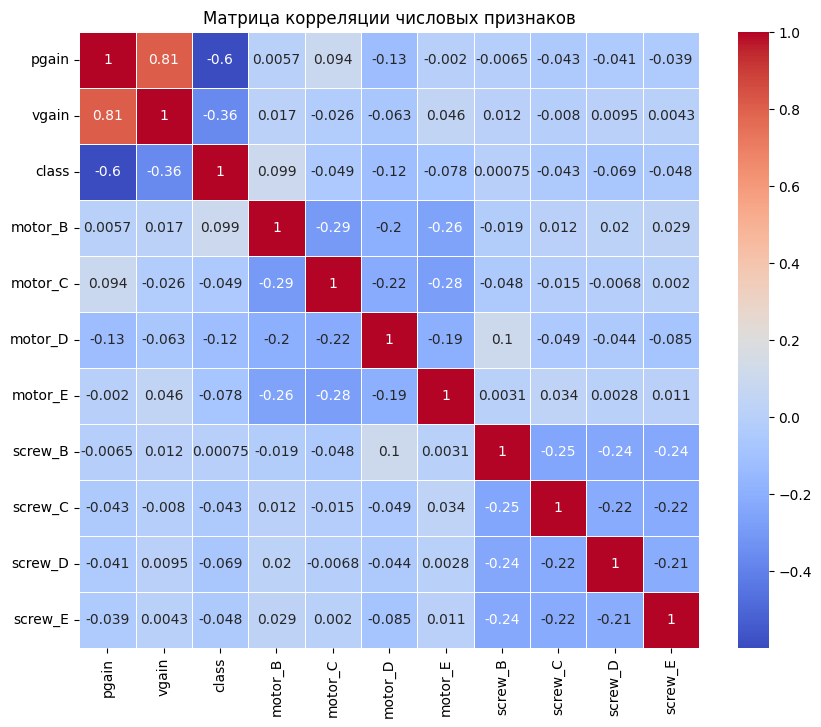

In [30]:
# Применим One-Hot Encoding к категориальным признакам 'motor' и 'screw'
data_encoded = pd.get_dummies(data, columns=['motor', 'screw'], drop_first=True)

# Построим матрицу корреляции для числовых признаков
corr_matrix = data_encoded.corr()

# Визуализируем матрицу корреляции с использованием heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляции числовых признаков')
plt.show()

- Мы построили матрицу корреляции для числовых признаков. Она может дать представление о взаимосвязи между признаками.
- Корреляция близка к 1 указывает на положительную линейную связь, а к -1 на отрицательную. Значения близкие к 0 говорят об отсутствии линейной связи.

Сделаем выводы:

- Корреляция между vgain и pgain равна 0.81, что может указывать на сильную положительную взаимосвязь между этими двумя признаками.
- Корреляция между class и pgain равна 0.6, что также указывает на некоторую положительную взаимосвязь.
- Корреляция между class и vgain равна 0.36, что также указывает на положительную взаимосвязь, но менее сильную по сравнению с pgain.

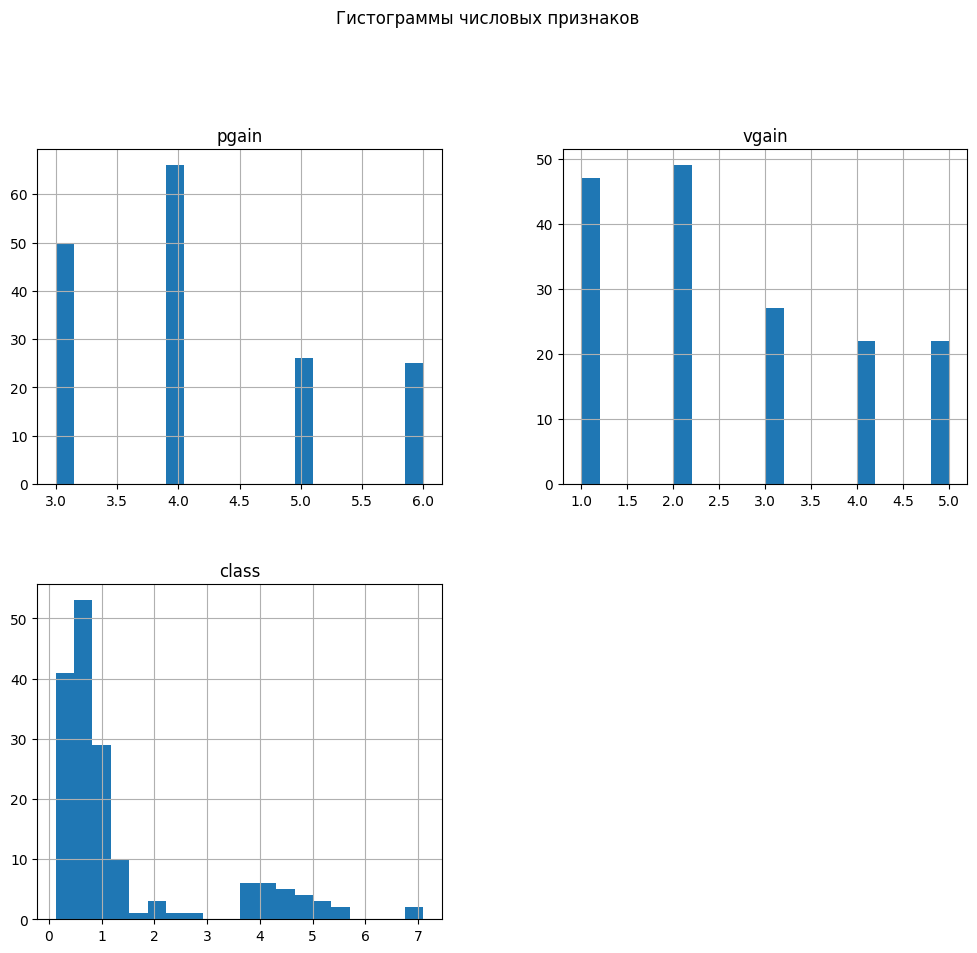

In [31]:
# Построим гистограммы числовых признаков
data_encoded.hist(figsize=(12, 10), bins=20)
plt.suptitle('Гистограммы числовых признаков', y=1.02)
plt.show()

C:\Users\Egor Davydov\AppData\Local\Temp\ipykernel_1348\3598666026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='motor', data=data, palette='viridis')


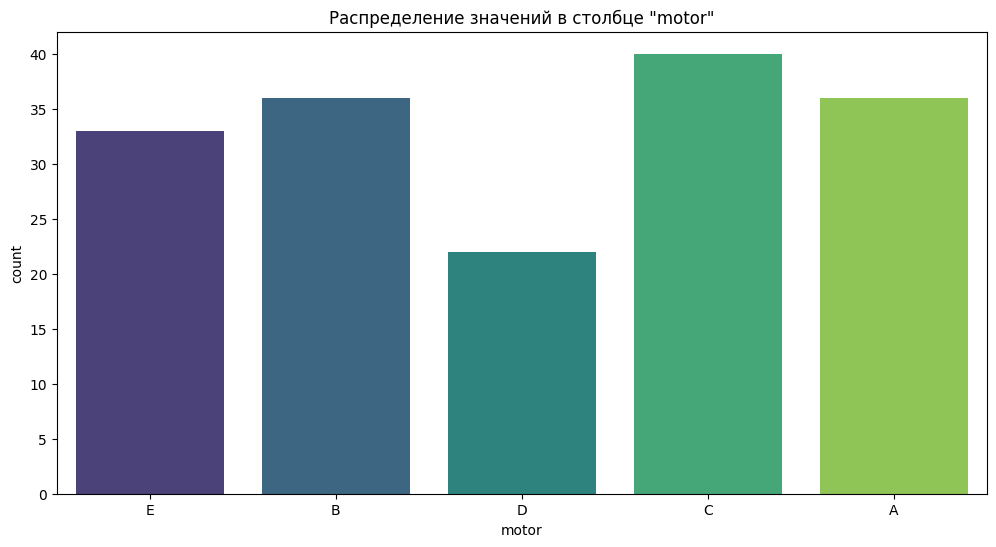

In [32]:
# Построим countplot для категориальных признаков
plt.figure(figsize=(12, 6))
sns.countplot(x='motor', data=data, palette='viridis')
plt.title('Распределение значений в столбце "motor"')
plt.show()

C:\Users\Egor Davydov\AppData\Local\Temp\ipykernel_1348\802408676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pgain', data=data, palette='viridis')


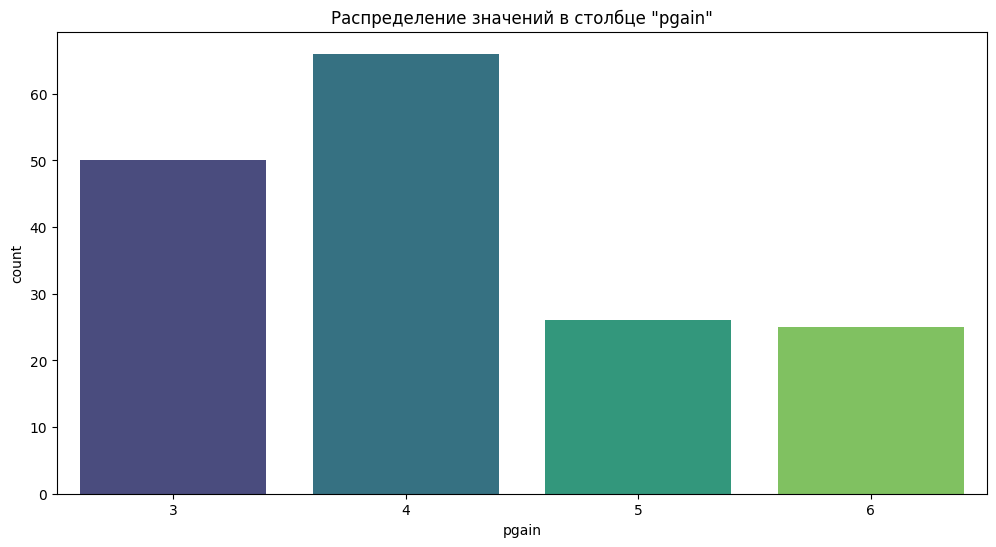

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='pgain', data=data, palette='viridis')
plt.title('Распределение значений в столбце "pgain"')
plt.show()

C:\Users\Egor Davydov\AppData\Local\Temp\ipykernel_1348\4152341636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vgain', data=data, palette='viridis')


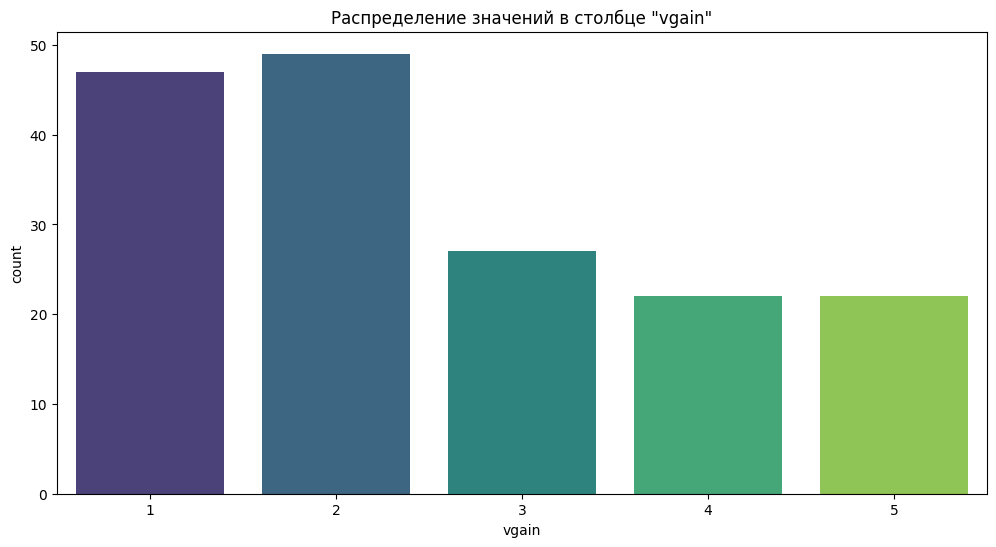

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(x='vgain', data=data, palette='viridis')
plt.title('Распределение значений в столбце "vgain"')
plt.show()

### Подготовка данных

1. деление данных: Сначала мы разделяем данные на признаки (X) и целевую переменную (y). Признак class является нашей целевой переменной, и мы исключаем его из признаков.
2. Преобразование категориальных признаков: Мы используем One-Hot Encoding для преобразования категориальных признаков в числовые. Это делается с помощью pd.get_dummies(), что позволяет нам создать бинарные (дамми) переменные для каждой категории внутри 'motor' и 'screw'.
3. Разделение на обучающий и тестовый наборы данных: Мы разделяем данные на обучающий и тестовый наборы с использованием train_test_split(). Обучающий набор используется для обучения модели, а тестовый - для оценки её производительности.
4. Нормализация числовых признаков: Числовые признаки pgain и vgain нормализуются с использованием StandardScaler(). Нормализация важна для метода k-ближайших соседей, так как этот метод чувствителен к масштабу признаков.
5. Создание и обучение модели Надарая-Ватсона (KNN): Мы создаем модель метода k-ближайших соседей (KNeighborsRegressor()), а затем обучаем её на обучающем наборе данных.
6. Предсказание и оценка производительности: Мы используем обученную модель для предсказания целевых значений на тестовом наборе данных и затем оцениваем её производительность с использованием среднеквадратичной ошибки (mean_squared_error). Значение MSE в данном случае равно 1.6835.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('class', axis=1)
y = data['class']

# Преобразование категориальных признаков в числовые
X = pd.get_dummies(X)

# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация числовых признаков
scaler = StandardScaler()
X_train[['pgain', 'vgain']] = scaler.fit_transform(X_train[['pgain', 'vgain']])
X_test[['pgain', 'vgain']] = scaler.transform(X_test[['pgain', 'vgain']])

In [36]:
from sklearn.neighbors import KNeighborsRegressor

# Создание модели Надарая-Ватсона
knn = KNeighborsRegressor()

# Обучение модели
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [37]:
# Предсказание на тестовых данных
y_pred = knn.predict(X_test)

# Оценка производительности модели
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.683543014734277


### Анализ результатов

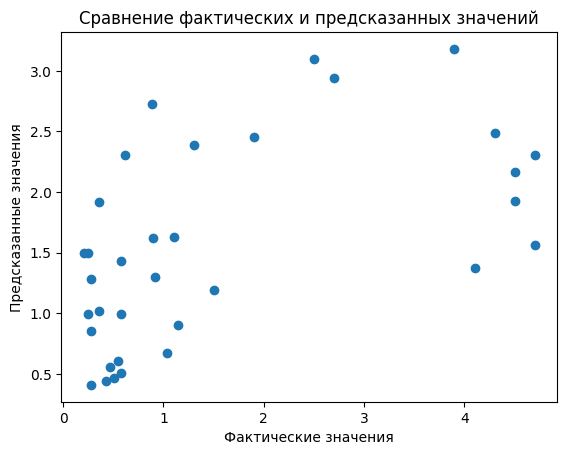

In [38]:
import matplotlib.pyplot as plt

# График фактических значений и предсказаний
plt.scatter(y_test, y_pred)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение фактических и предсказанных значений")
plt.show()

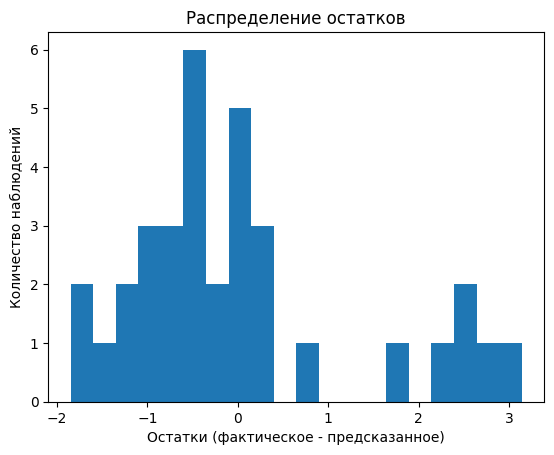

In [39]:
# Распределение остатков
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel("Остатки (фактическое - предсказанное)")
plt.ylabel("Количество наблюдений")
plt.title("Распределение остатков")
plt.show()

Большинство остатков сосредоточены вокруг значения -0,5. Это может указывать на то, что модель имеет тенденцию недооценивать фактические значения. Оптимизируем это

### Оптимизация

In [40]:
from sklearn.model_selection import GridSearchCV

# Создание модели Надарая-Ватсона
knn = KNeighborsRegressor()

# Задаем параметры для оптимизации
param_grid = {'n_neighbors': range(1, 21)}  # Попробуем от 1 до 20 соседей

# Используем GridSearchCV для оптимизации
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Вывод наилучших параметров
print(f"Наилучшие параметры: {grid_search.best_params_}")

# Обучение модели с наилучшими параметрами
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_optimized = best_knn.predict(X_test)

# Оценка производительности оптимизированной модели
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
print(f'Mean Squared Error (оптимизированная модель): {mse_optimized}')


Наилучшие параметры: {'n_neighbors': 10}
Mean Squared Error (оптимизированная модель): 0.6863671663751841


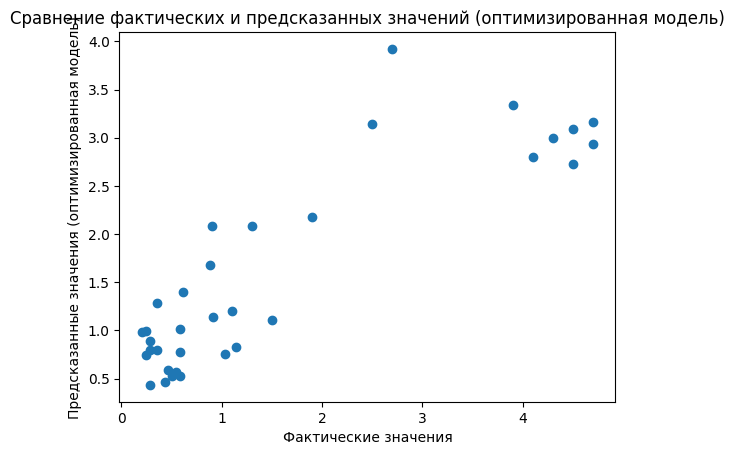

In [41]:
plt.scatter(y_test, y_pred_optimized)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения (оптимизированная модель)")
plt.title("Сравнение фактических и предсказанных значений (оптимизированная модель)")
plt.show()

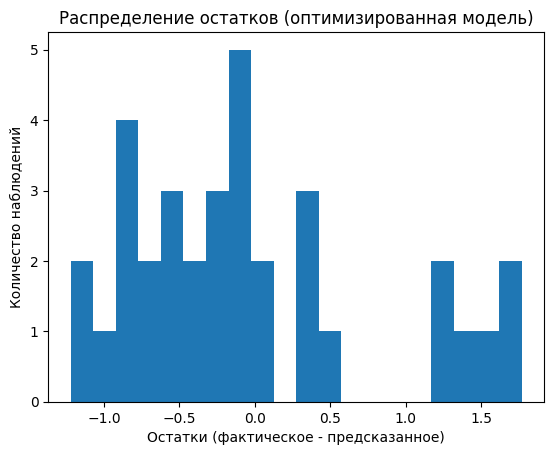

In [42]:
residuals_optimized = y_test - y_pred_optimized
plt.hist(residuals_optimized, bins=20)
plt.xlabel("Остатки (фактическое - предсказанное)")
plt.ylabel("Количество наблюдений")
plt.title("Распределение остатков (оптимизированная модель)")
plt.show()

Как видим, результаты улучшились

### БОЛЬШЕ ОПТИМИЗАЦИИ!!!

Вместо использования одного параметра n_neighbors, мы можем рассмотреть несколько параметров с использованием кросс-валидации и поиска по сетке

In [43]:
from sklearn.linear_model import LinearRegression

# Создание модели линейной регрессии
linear_reg = LinearRegression()

# Обучение модели
linear_reg.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_linear = linear_reg.predict(X_test)

# Оценка производительности модели линейной регрессии
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error (линейная регрессия): {mse_linear}')

Mean Squared Error (линейная регрессия): 0.8628435876404968


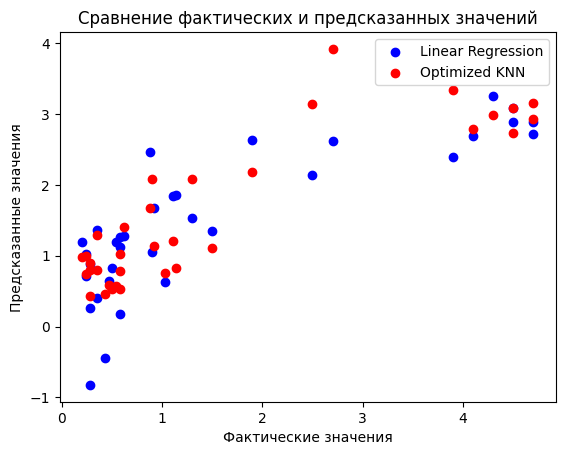

In [44]:
# График фактических значений и предсказаний (линейная регрессия)
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
# График фактических значений и предсказаний (оптимизированная KNN)
plt.scatter(y_test, y_pred_optimized, color='red', label='Optimized KNN')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение фактических и предсказанных значений")
plt.legend()
plt.show()

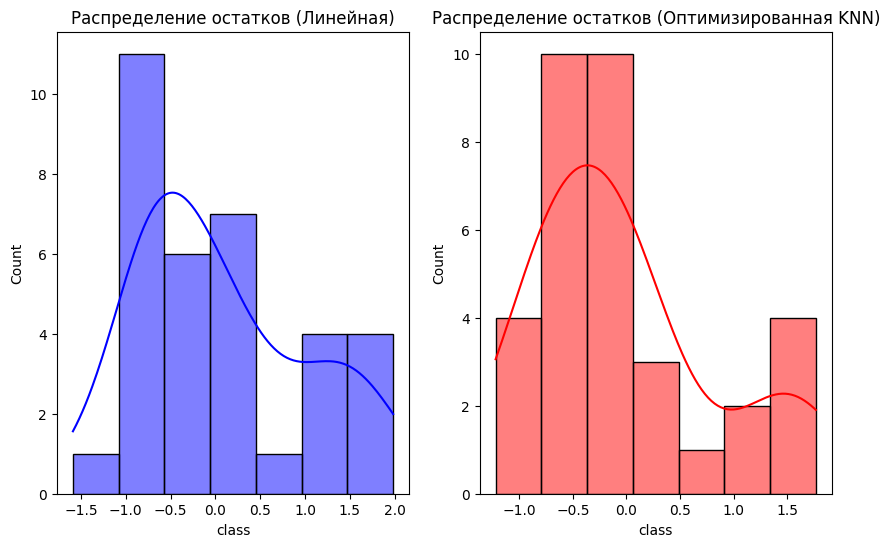

In [45]:
# Расчет остатков для линейной регрессии и оптимизированной KNN
residuals_linear = y_test - y_pred_linear
residuals_knn = y_test - y_pred_optimized

# График распределения остатков
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_linear, kde=True, color='blue')
plt.title('Распределение остатков (Линейная)')

plt.subplot(1, 2, 2)
sns.histplot(residuals_knn, kde=True, color='red')
plt.title('Распределение остатков (Оптимизированная KNN)')

plt.show()

### Дополнительные визуализации

График предсказаний по признакам (оптимизированная KNN):
- Цель: Визуализировать, как оптимизированная модель k-ближайших соседей предсказывает значения в зависимости от каждого из признаков.
- Интерпретация: Каждый график отображает фактические значения (обозначены точками) и предсказанные значения (обозначены линией) для конкретного признака. Это позволяет оценить влияние каждого признака на предсказания модели.

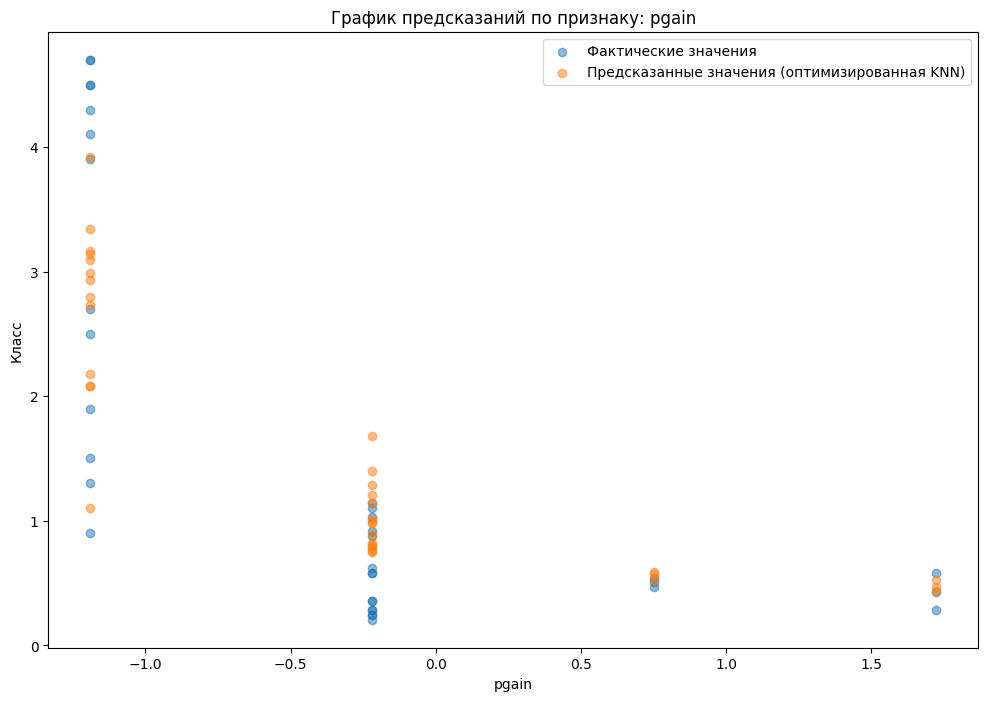

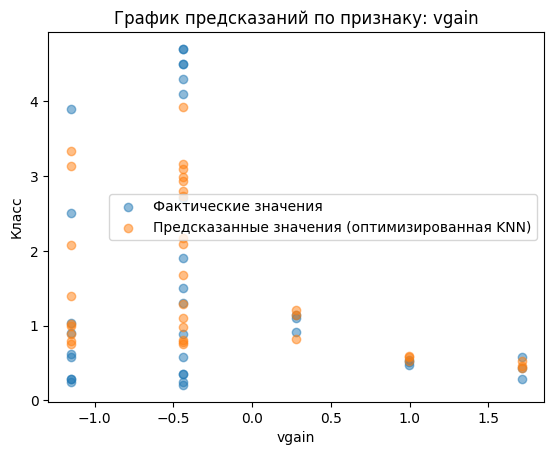

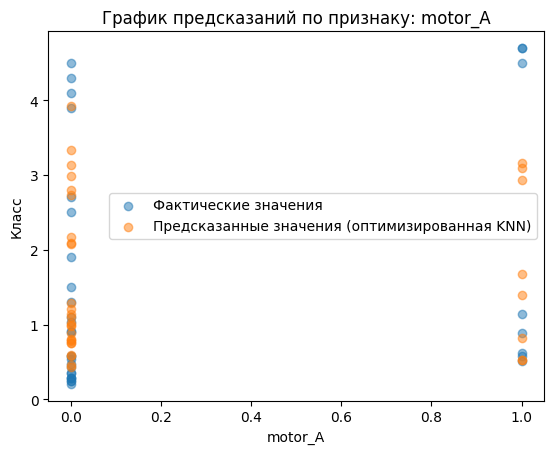

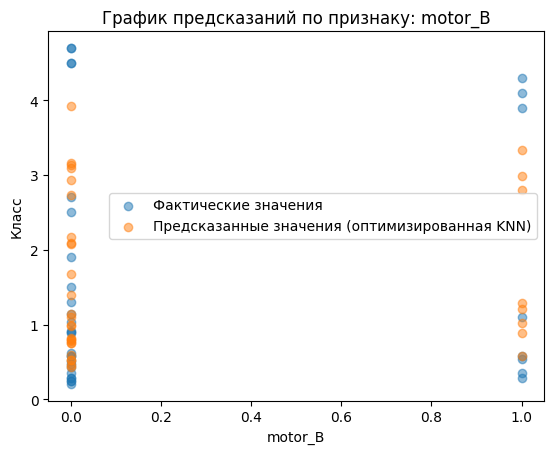

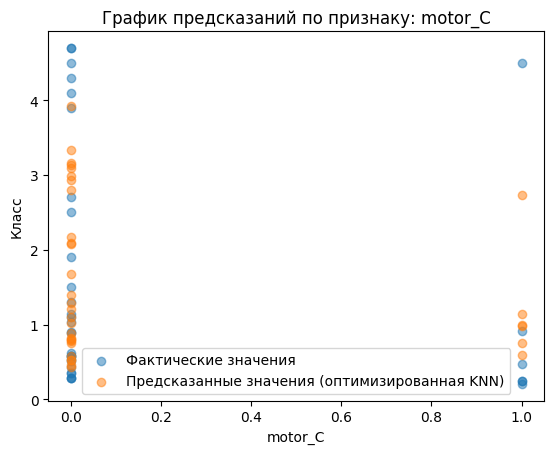

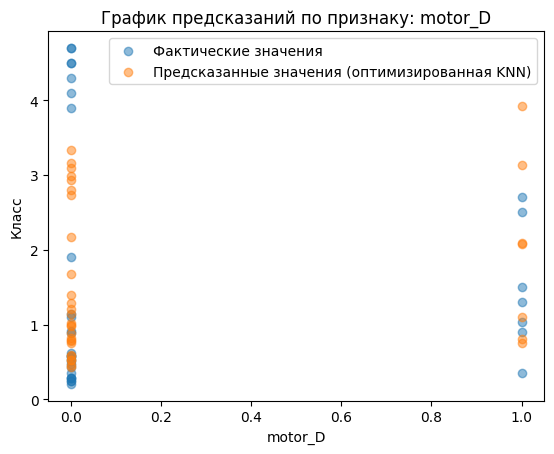

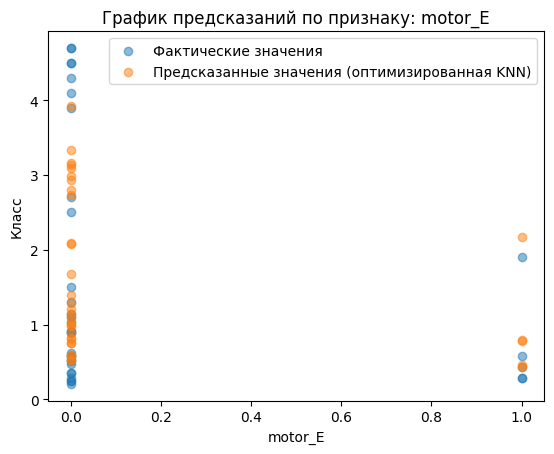

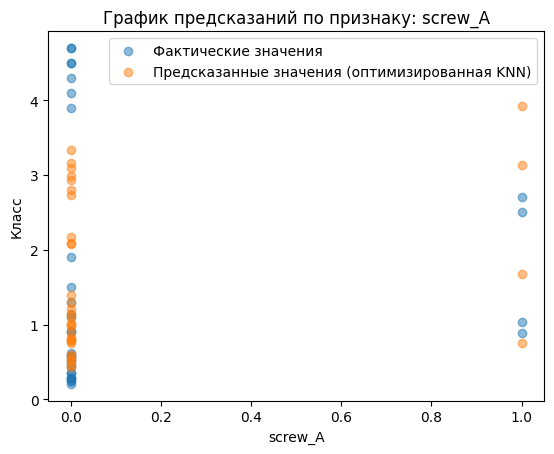

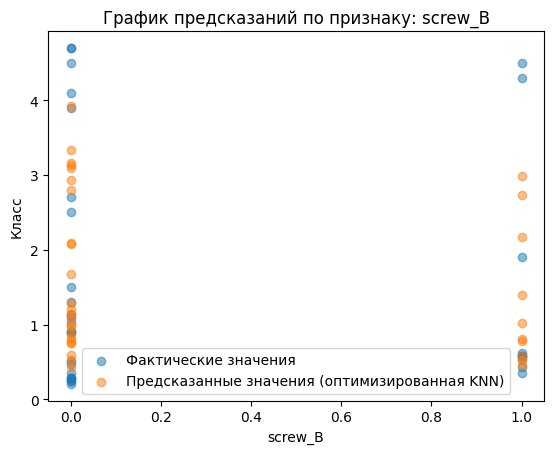

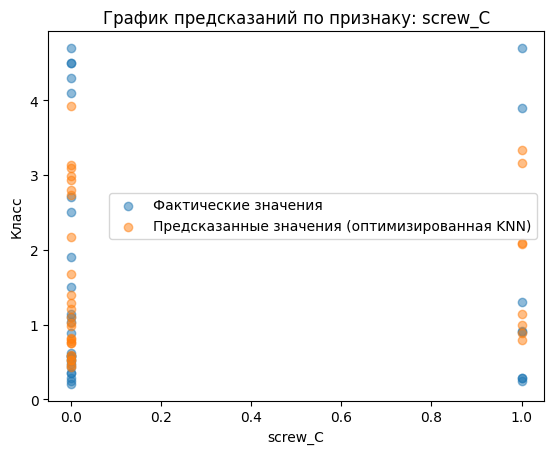

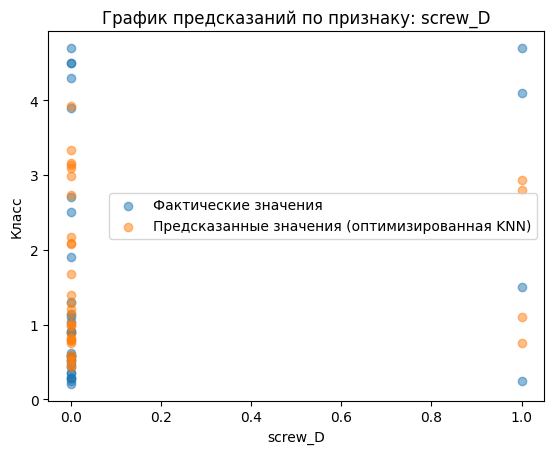

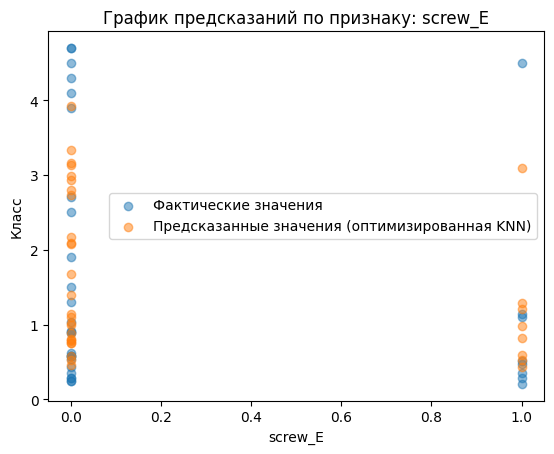

In [46]:
plt.figure(figsize=(12, 8))

for feature in X.columns:
    plt.scatter(X_test[feature], y_test, label='Фактические значения', alpha=0.5)
    plt.scatter(X_test[feature], y_pred_optimized, label='Предсказанные значения (оптимизированная KNN)', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Класс')
    plt.title(f'График предсказаний по признаку: {feature}')
    plt.legend()
    plt.show()

График важности признаков для линейной регрессии:
- Цель: Показать, какие признаки оказывают наибольшее влияние в линейной регрессии.
- Интерпретация: График отображает важность каждого признака в линейной регрессии. Чем выше вес признака, тем сильнее он влияет на предсказания. Это полезно для определения наиболее значимых факторов.

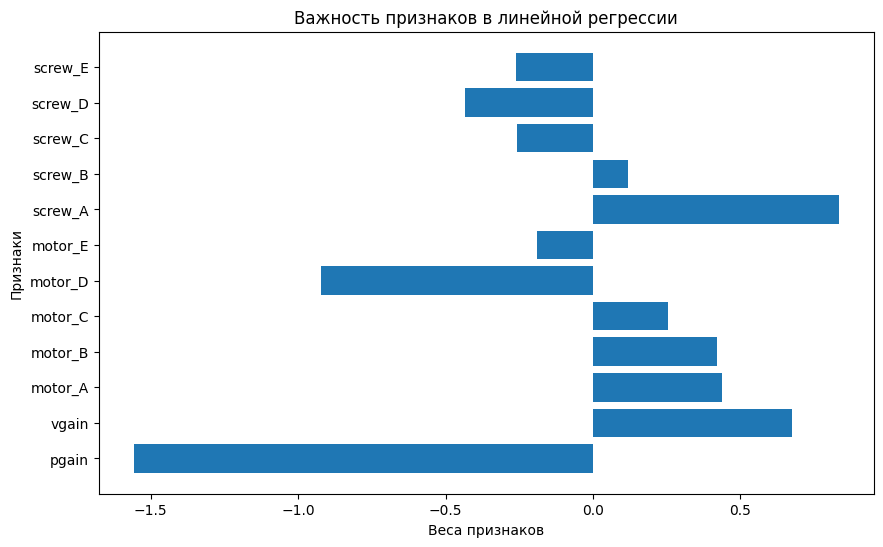

In [66]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, linear_reg.coef_)
plt.xlabel('Веса признаков')
plt.ylabel('Признаки')
plt.title('Важность признаков в линейной регрессии')
plt.show()

Парные графики для числовых признаков:
- Цель: Визуально оценить взаимосвязи между числовыми признаками.
- Интерпретация: Каждый график представляет собой диаграмму рассеяния для пары числовых признаков. Это позволяет выявить возможные корреляции и зависимости между признаками, что может быть полезно для понимания структуры данных.

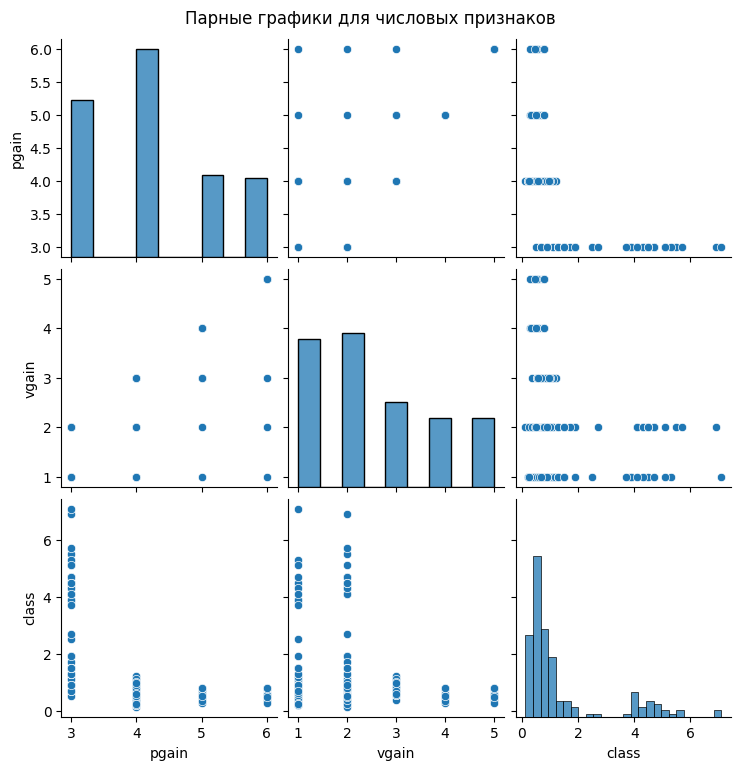

In [48]:
sns.pairplot(data_encoded, vars=['pgain', 'vgain', 'class'])
plt.suptitle('Парные графики для числовых признаков', y=1.02)
plt.show()

### Прогнозы модели

In [67]:
# Создадим несколько случайных наблюдений
random_observations = pd.DataFrame({
    'motor': [random.choice(['A', 'B', 'C', 'D', 'E']) for _ in range(5)],
    'screw': [random.choice(['A', 'B', 'C', 'D', 'E']) for _ in range(5)],
    'pgain': [random.randint(3, 6) for _ in range(5)],
    'vgain': [random.randint(1, 5) for _ in range(5)]
})

# Применим One-Hot Encoding
random_observations_encoded = pd.get_dummies(random_observations, columns=['motor', 'screw'], drop_first=True)

# Убедимся, что признаки в новых наблюдениях соответствуют тем, что использовались при обучении
missing_features = set(X_train.columns) - set(random_observations_encoded.columns)

# Добавим отсутствующие признаки со значением 0
for feature in missing_features:
    random_observations_encoded[feature] = 0

# Упорядочим признаки в том же порядке, что и при обучении
random_observations_encoded = random_observations_encoded[X_train.columns]

# Предсказание с использованием обученной модели для нескольких наблюдений
predicted_values_random = best_knn.predict(random_observations_encoded)

for i, observation in enumerate(random_observations.iterrows()):
    print(f'Случайное наблюдение {i + 1}: {observation[1]}')
    print(f'Предсказанное значение: {predicted_values_random[i]}\n')


Случайное наблюдение 1: motor    C
screw    E
pgain    4
vgain    3
Name: 0, dtype: object
Предсказанное значение: 0.498752466

Случайное наблюдение 2: motor    D
screw    B
pgain    4
vgain    3
Name: 1, dtype: object
Предсказанное значение: 0.48750238799999995

Случайное наблюдение 3: motor    D
screw    C
pgain    3
vgain    4
Name: 2, dtype: object
Предсказанное значение: 0.45000212599999995

Случайное наблюдение 4: motor    C
screw    C
pgain    4
vgain    5
Name: 3, dtype: object
Предсказанное значение: 0.491252414

Случайное наблюдение 5: motor    D
screw    D
pgain    4
vgain    5
Name: 4, dtype: object
Предсказанное значение: 0.4800023339999999

